In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import kagglehub
import os
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [5]:
fake_df = pd.read_csv("/content/Fake.csv")  # Update with your correct path
true_df = pd.read_csv("/content/True.csv")  # Update with your correct path

In [6]:
# Add labels
fake_df["label"] = 0  # Fake news
true_df["label"] = 1  # True news

In [7]:
# Combine both datasets
df = pd.concat([fake_df, true_df], axis=0).reset_index(drop=True)

# Shuffle dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [8]:
df.head()

,title,text,subject,date,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",0
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",1
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",1
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",0
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",1


In [10]:
# Select relevant columns
df = df[['text', 'label']]  # Use the 'text' column for analysis

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df["text"], df["label"], test_size=0.2, random_state=42)


In [11]:
# Convert text into numerical format using TF-IDF
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler(with_mean=False)
x_train_standard = st.fit_transform(X_train_tfidf)
x_test_standard = st.transform(X_test_tfidf)

In [14]:
k = KNeighborsClassifier(n_neighbors=3,weights='distance',p=1)
k.fit(x_train_standard, y_train)

KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')

In [15]:
pred = k.predict(x_test_standard)

In [16]:
accuracy = accuracy_score(y_test, pred)
print(accuracy)
print("\nClassification Report:\n", classification_report(y_test, pred))

0.5244988864142539

Classification Report:
               precision    recall  f1-score   support

           0       0.52      1.00      0.69      4710
           1       0.00      0.00      0.00      4270

    accuracy                           0.52      8980
   macro avg       0.26      0.50      0.34      8980
weighted avg       0.28      0.52      0.36      8980



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [18]:
y_pred = model.predict(X_test_tfidf)

In [19]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.9850

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      4710
           1       0.98      0.99      0.98      4270

    accuracy                           0.98      8980
   macro avg       0.98      0.99      0.98      8980
weighted avg       0.99      0.98      0.98      8980



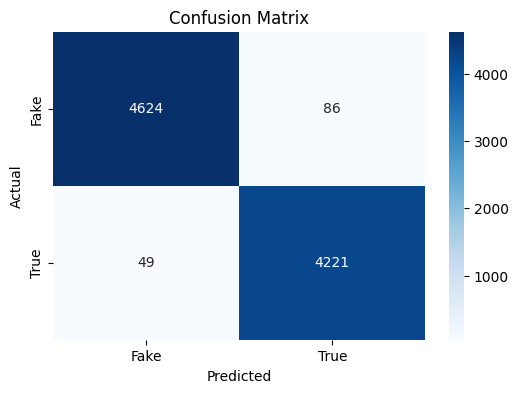

In [20]:
# Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "True"], yticklabels=["Fake", "True"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [21]:
nv = MultinomialNB()
nv.fit(X_train_tfidf, y_train)
print(accuracy_score(y_test, nv.predict(X_test_tfidf)))
print(confusion_matrix(y_test, nv.predict(X_test_tfidf)))

0.9263919821826281
[[4389  321]
 [ 340 3930]]


In [23]:
xg = XGBClassifier()
xg.fit(X_train_tfidf, y_train)
print(accuracy_score(y_test, xg.predict(X_test_tfidf)))
print(confusion_matrix(y_test, xg.predict(X_test_tfidf)))

0.9973273942093541
[[4696   14]
 [  10 4260]]


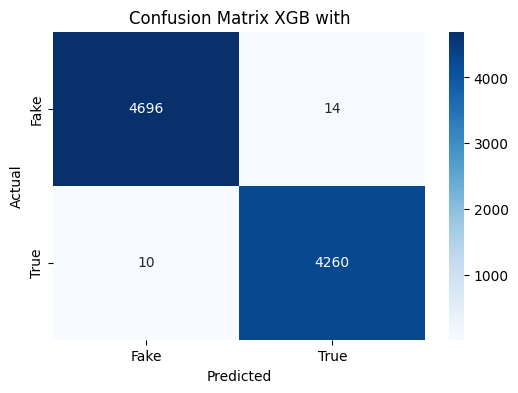

In [27]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, xg.predict(X_test_tfidf)), annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "True"], yticklabels=["Fake", "True"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix XGB with")
plt.show()

In [ ]:
#rf,cv,dt

In [28]:
dt = DecisionTreeClassifier()
dt.fit(X_train_tfidf, y_train)
print(accuracy_score(y_test, dt.predict(X_test_tfidf)))
print(confusion_matrix(y_test, dt.predict(X_test_tfidf)))

0.9956570155902005
[[4695   15]
 [  24 4246]]


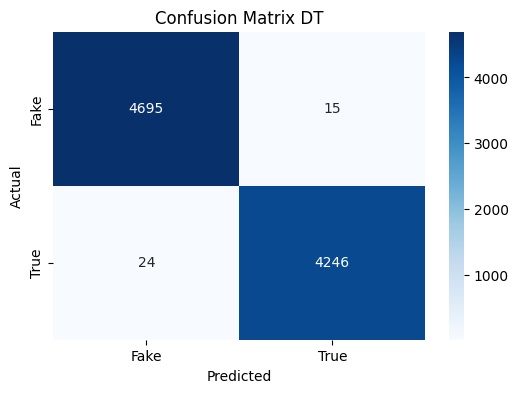

In [29]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, dt.predict(X_test_tfidf)), annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "True"], yticklabels=["Fake", "True"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix DT")
plt.show()

In [30]:
rf = RandomForestClassifier()
rf.fit(X_train_tfidf, y_train)
print(accuracy_score(y_test, rf.predict(X_test_tfidf)))
print(confusion_matrix(y_test, rf.predict(X_test_tfidf)))


0.9968819599109131
[[4697   13]
 [  15 4255]]


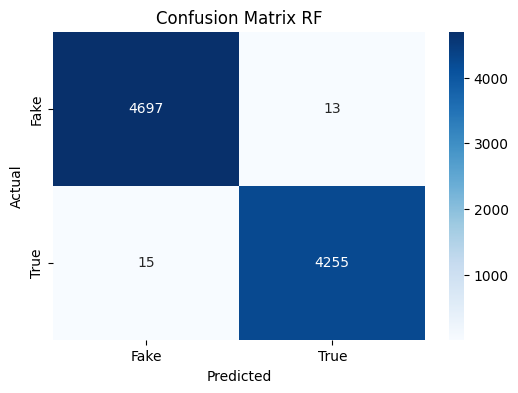

In [31]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, rf.predict(X_test_tfidf)), annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "True"], yticklabels=["Fake", "True"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix RF")
plt.show()

In [32]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 17.4 MB/s eta 0:00:00


In [33]:
import optuna

In [34]:
from sklearn.model_selection import cross_val_score

def objective_logreg(trial):
    C = trial.suggest_float('C', 1e-3, 1e2, log=True)
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    solver = 'liblinear' if penalty == 'l1' else 'lbfgs'
    class_weight = trial.suggest_categorical('class_weight', [None, 'balanced'])

    model = LogisticRegression(
        C=C, penalty=penalty, solver=solver,
        class_weight=class_weight, max_iter=1000, random_state=42
    )
    score = cross_val_score(model, X_train_tfidf, y_train, cv=3, scoring='accuracy').mean()
    return score

In [35]:
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler())  # We aim to maximize accuracy
study.optimize(objective_logreg, n_trials=100)  # Run 50 trials to find the best hyperparameters

[I 2025-09-18 18:36:16,670] A new study created in memory with name: no-name-e02f6c38-f58a-487a-8676-e1c72e0ddcf8
[I 2025-09-18 18:36:20,951] Trial 0 finished with value: 0.9677320733539315 and parameters: {'C': 0.083798706340025, 'penalty': 'l2', 'class_weight': None}. Best is trial 0 with value: 0.9677320733539315.
[I 2025-09-18 18:36:21,942] Trial 1 finished with value: 0.9511943832638918 and parameters: {'C': 0.014880830018439291, 'penalty': 'l2', 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9677320733539315.
[I 2025-09-18 18:36:25,165] Trial 2 finished with value: 0.9937078886342695 and parameters: {'C': 22.170735553432753, 'penalty': 'l1', 'class_weight': 'balanced'}. Best is trial 2 with value: 0.9937078886342695.
[I 2025-09-18 18:36:27,525] Trial 3 finished with value: 0.993568695842514 and parameters: {'C': 8.129059676695109, 'penalty': 'l1', 'class_weight': None}. Best is trial 2 with value: 0.9937078886342695.
[I 2025-09-18 18:36:28,622] Trial 4 finished with v

In [36]:
print(f'Best trial accuracy: {study.best_trial.value}')
print(f'Best hyperparameters: {study.best_trial.params}')

Best trial accuracy: 0.9939584640300535
Best hyperparameters: {'C': 16.432733698954646, 'penalty': 'l1', 'class_weight': 'balanced'}


In [38]:
lg = LogisticRegression(C =23.657946723302118, penalty='l1',class_weight='balanced', solver= 'liblinear')
lg.fit(X_train_tfidf, y_train)
print(accuracy_score(y_test, lg.predict(X_test_tfidf)))
print(confusion_matrix(y_test, lg.predict(X_test_tfidf)))

0.9947661469933184
[[4692   18]
 [  29 4241]]


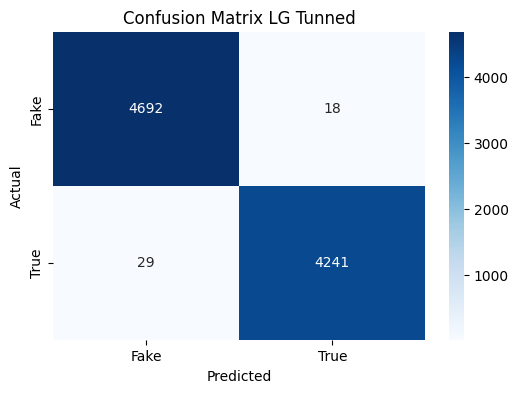

In [39]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, lg.predict(X_test_tfidf)), annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "True"], yticklabels=["Fake", "True"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix LG Tunned")
plt.show()

In [40]:
def objective_dt(trial):
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss'])
    max_depth = trial.suggest_int('max_depth', 2, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])

    model = DecisionTreeClassifier(
        criterion=criterion, max_depth=max_depth,
        min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
        max_features=max_features, random_state=42
    )
    score = cross_val_score(model, X_train_tfidf, y_train, cv=3, scoring='accuracy').mean()
    return score

In [41]:
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler())  # We aim to maximize accuracy
study.optimize(objective_dt, n_trials=100)  # Run 50 trials to find the best hyperparameters

[I 2025-09-18 18:41:54,787] A new study created in memory with name: no-name-56e79f89-036b-4de2-96af-a08ef9d77b4c
[I 2025-09-18 18:41:55,468] Trial 0 finished with value: 0.6781283893884305 and parameters: {'criterion': 'log_loss', 'max_depth': 15, 'min_samples_split': 7, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 0 with value: 0.6781283893884305.
[I 2025-09-18 18:41:57,077] Trial 1 finished with value: 0.885016233624441 and parameters: {'criterion': 'entropy', 'max_depth': 36, 'min_samples_split': 4, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.885016233624441.
[I 2025-09-18 18:41:58,256] Trial 2 finished with value: 0.8885788514561296 and parameters: {'criterion': 'gini', 'max_depth': 18, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.8885788514561296.
[I 2025-09-18 18:41:58,816] Trial 3 finished with value: 0.5602767854803278 and parameters: {'criterion': 'log_loss', 'max_depth

In [42]:
print(f'Best trial accuracy: {study.best_trial.value}')
print(f'Best hyperparameters: {study.best_trial.params}')

Best trial accuracy: 0.994765873380306
Best hyperparameters: {'criterion': 'log_loss', 'max_depth': 8, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': None}


In [43]:
dt = DecisionTreeClassifier(max_depth=13,min_samples_split=17,min_samples_leaf=3,max_features=None,criterion='gini')
dt.fit(X_train_tfidf, y_train)
print(accuracy_score(y_test, dt.predict(X_test_tfidf)))
print(confusion_matrix(y_test, dt.predict(X_test_tfidf)))

0.9946547884187082
[[4681   29]
 [  19 4251]]


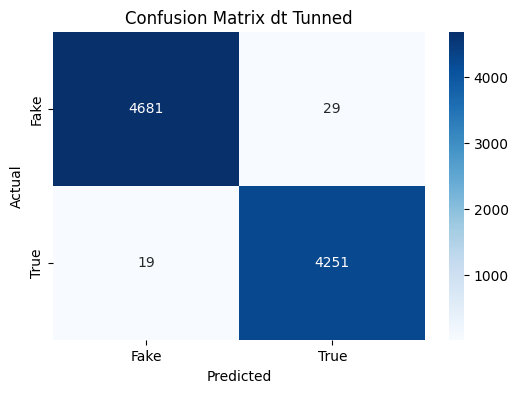

In [44]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, dt.predict(X_test_tfidf)), annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "True"], yticklabels=["Fake", "True"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix dt Tunned")
plt.show()

In [45]:
def objective_rf(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    max_depth = trial.suggest_int('max_depth', 3, 50)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])
    class_weight = trial.suggest_categorical('class_weight', [None, 'balanced'])

    model = RandomForestClassifier(
        n_estimators=n_estimators, max_depth=max_depth, max_features=max_features,
        min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,
        bootstrap=bootstrap, class_weight=class_weight, random_state=42
    )
    score = cross_val_score(model, X_train_tfidf, y_train, cv=3, scoring='accuracy').mean()
    return score

In [46]:
from xgboost import XGBClassifier

In [47]:
def objective_xgb(trial):
    # Suggest hyperparameters
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),    # boosting rounds
        "max_depth": trial.suggest_int("max_depth", 3, 15),             # depth of trees
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),  # step size shrinkage
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),        # % of rows used per tree
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0), # % of features used per tree
        "gamma": trial.suggest_float("gamma", 0, 5),                    # min loss reduction for split
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10), # min sum of weights in a child
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 1.0),          # L1 regularization
        "reg_lambda": trial.suggest_float("reg_lambda", 0, 1.0),        # L2 regularization
        "n_jobs": -1,
        "random_state": 42,
        "tree_method": "hist",   # use "hist" if no GPU
        "predictor": "gpu_predictor" # only works if GPU enabled
    }

    # Create model with suggested params
    model = XGBClassifier(
        use_label_encoder=False,
        eval_metric="logloss",
        **params
    )

    # Evaluate model
    score = cross_val_score(
        model, X_train_tfidf, y_train, cv=3, scoring="accuracy", n_jobs=1
    ).mean()

    return score


In [48]:
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
print(accuracy_score(y_test, nb.predict(X_test_tfidf)))
print(confusion_matrix(y_test, nb.predict(X_test_tfidf)))

0.9263919821826281
[[4389  321]
 [ 340 3930]]


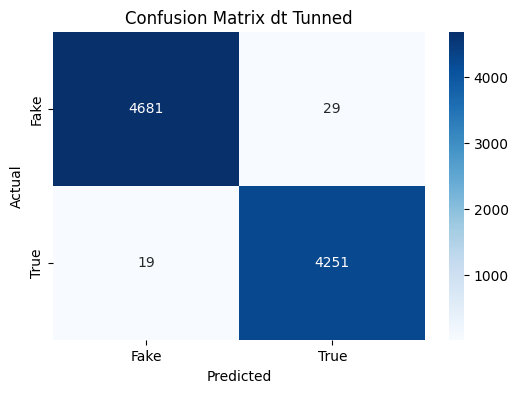

In [49]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, dt.predict(X_test_tfidf)), annot=True, fmt="d", cmap="Blues", xticklabels=["Fake", "True"], yticklabels=["Fake", "True"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix dt Tunned")
plt.show()